Initial population: [0, 1, 0, 0, 0]


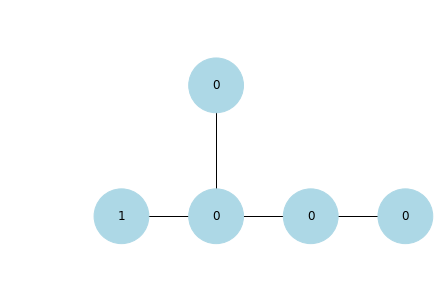

Weights: [0, -2, 1, 0, 0]
Updating node 2


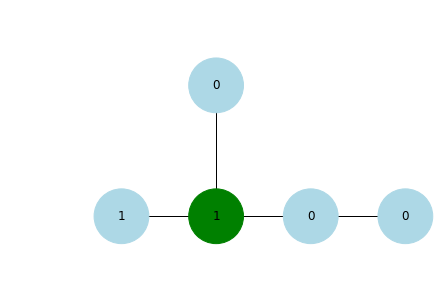

Weights: [1, -1, -1, 1, 0]
Updating node 0


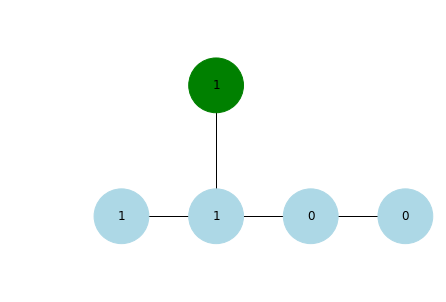

Weights: [-1, -1, 0, 1, 0]
Updating node 3


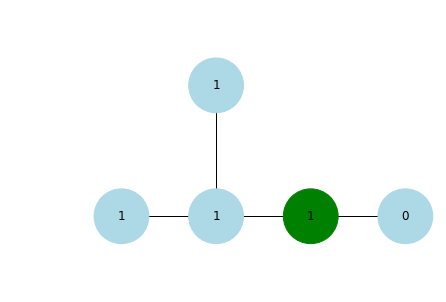

Weights: [-1, -1, 1, -1, 1]
Updating node 2


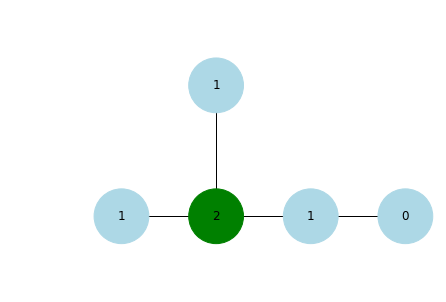

Weights: [0, 0, -1, 0, 1]
Updating node 4


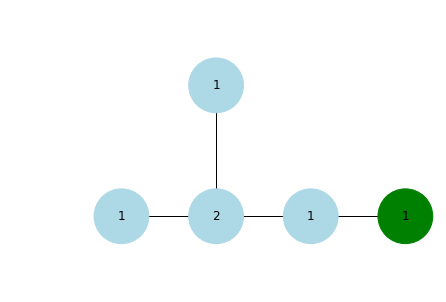

Weights: [0, 0, -1, 1, -1]
Updating node 3


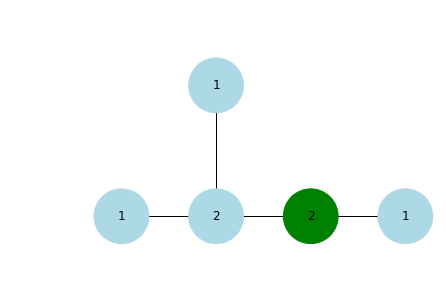

Next weights are [0, 0, 0, -1, 0] so there is no further possible increasing population step.


The poset is [2, 0, 3, 2, 4, 3] 
____________________________________________________







Starting again from initial population: [0, 1, 0, 0, 0]
Applying path:  [2, 3, 4, 0, 2, 3]


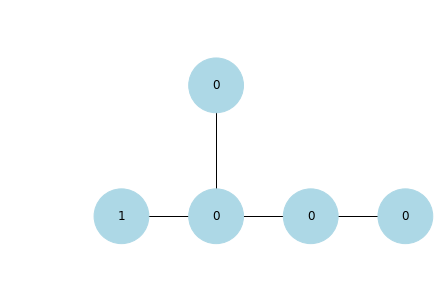

Weights: [0, -2, 1, 0, 0]
Updating node 2


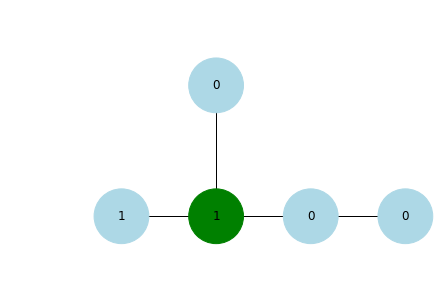

Weights: [1, -1, -1, 1, 0]
Updating node 3


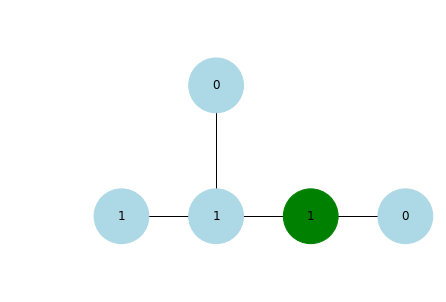

Weights: [1, -1, 0, -1, 1]
Updating node 4


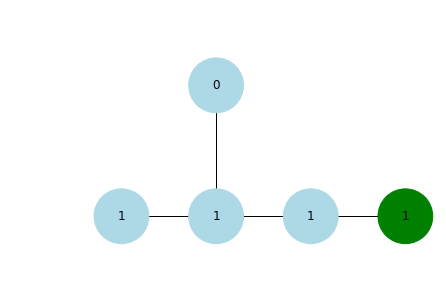

Weights: [1, -1, 0, 0, -1]
Updating node 0


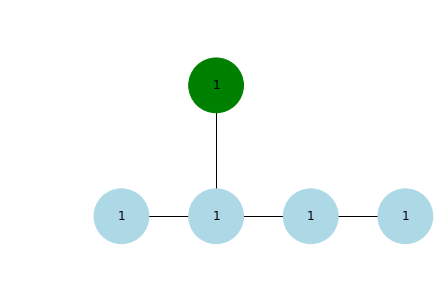

Weights: [-1, -1, 1, 0, -1]
Updating node 2


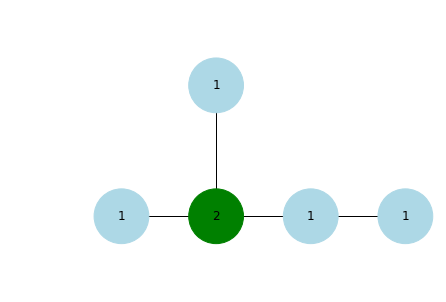

Weights: [0, 0, -1, 1, -1]
Updating node 3


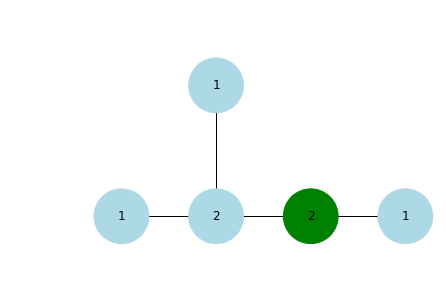

Next weights are [0, 0, 0, -1, 0] so there is no further possible increasing population step
____________________________________________________







Starting again from initial population: [0, 1, 0, 0, 0]
Applying path:  [2, 0, 3, 4, 2, 3]


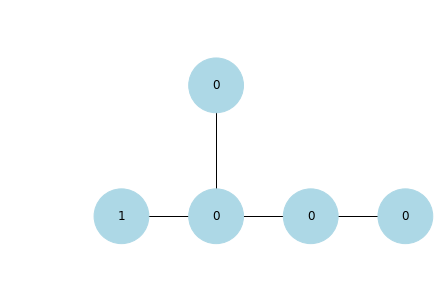

Weights: [0, -2, 1, 0, 0]
Updating node 2


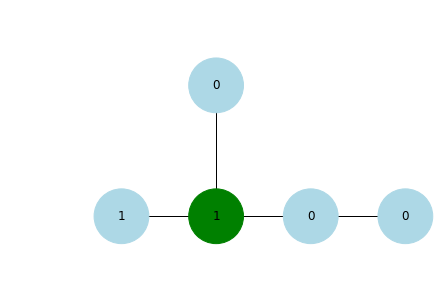

Weights: [1, -1, -1, 1, 0]
Updating node 0


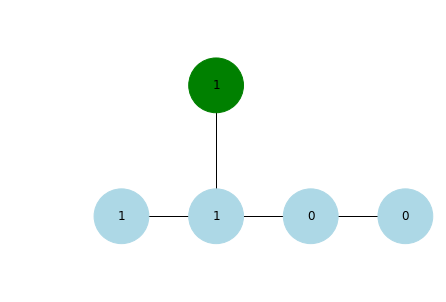

Weights: [-1, -1, 0, 1, 0]
Updating node 3


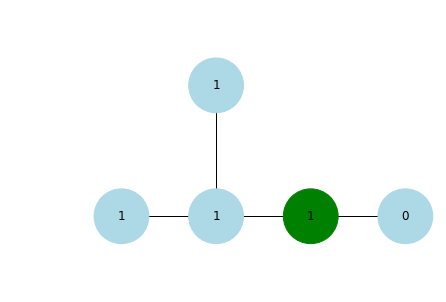

Weights: [-1, -1, 1, -1, 1]
Updating node 4


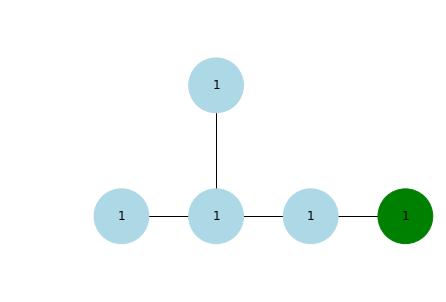

Weights: [-1, -1, 1, 0, -1]
Updating node 2


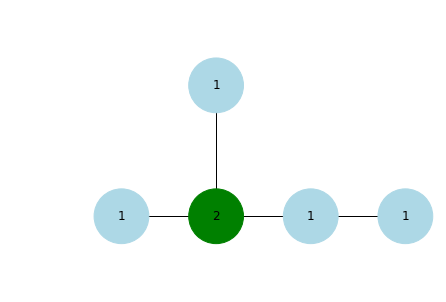

Weights: [0, 0, -1, 1, -1]
Updating node 3


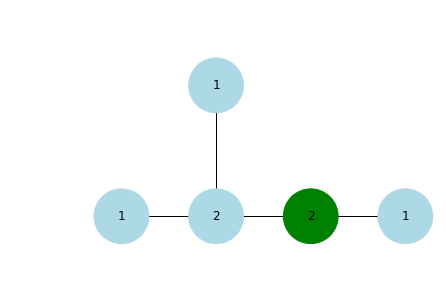

Next weights are [0, 0, 0, -1, 0] so there is no further possible increasing population step
____________________________________________________









In [ ]:
# the following code generated the previous graphs
from sympy import *
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

g = nx.MultiGraph()
g.add_node(0,pos=(2,0.75))
g.add_node(1,pos=(1,0.25))
g.add_node(2,pos=(2,0.25))
g.add_node(3,pos=(3,0.25))
g.add_node(4,pos=(4,0.25))
g.add_node(5,pos=(4,0))
g.add_node(6,pos=(0,1))
g.add_edges_from([(0, 2), (1, 2), (3, 2), (3, 4)])
pos = nx.get_node_attributes(g, 'pos')
color = ['lightblue','lightblue','lightblue','lightblue','lightblue','none','none']
size = [3000] * 7

def update(population, graph):
    nx.set_node_attributes(graph, {node:population[node] for node in range(len(population))}, 'pop')

def calc_weights(population, weight):
    return [sum([population[col]*weight[col][row] for col in range(len(population))]) for row in range(len(population))] 

weight = [[-2,  0,  1,  0,  0],
          [ 0, -2,  1,  0,  0],
          [ 1,  1, -2,  1,  0],
          [ 0,  0,  1, -2,  1],
          [ 0,  0,  0,  1, -2]]

poset = []

population = [0, 1, 0, 0, 0]
nx.set_node_attributes(g, {node:population[node] for node in range(len(population))}, 'pop')
labels = nx.get_node_attributes(g, 'pop')
nx.draw(g, pos, with_labels=True, labels = labels, node_size=size, node_color = color)
print('Initial population:', population)
plt.show()


while True:
    weights = calc_weights(population, weight)
    node = max(weights)
    if node <= 0:
        break
    i = weights.index(node)
    population[i] += node
    nx.set_node_attributes(g, {node:population[node] for node in range(len(population))}, 'pop')
    color[i]='green'
    labels = nx.get_node_attributes(g, 'pop')
    nx.draw(g, pos, with_labels=True, labels = labels, node_size=size, node_color = color)
    print('Weights:', weights)
    print('Updating node', i)
    plt.show()
    color[i]='lightblue'
    poset += [i]
print('Next weights are', weights,'so there is no further possible increasing population step.\n\n')
print('The poset is',poset,'\n____________________________________________________\n\n\n\n\n\n\n')

otherpaths = [[2, 3, 4, 0, 2, 3], 
              [2, 0, 3, 4, 2, 3]]
for path in otherpaths:
    population = [0, 1, 0, 0, 0]
    nx.set_node_attributes(g, {node:population[node] for node in range(len(population))}, 'pop')
    labels = nx.get_node_attributes(g, 'pop')
    nx.draw(g, pos, with_labels=True, labels = labels, node_size=size, node_color = color)
    print('Starting again from initial population:', population)
    print('Applying path: ', path)
    plt.show()
    for node in path:
        weights = calc_weights(population, weight)
        pop = weights[node]
        population[node] += pop
        nx.set_node_attributes(g, {node:population[node] for node in range(len(population))}, 'pop')
        color[node]='green'
        labels = nx.get_node_attributes(g, 'pop')
        nx.draw(g, pos, with_labels=True, labels = labels, node_size=size, node_color = color)
        print('Weights:', weights)
        print('Updating node', node)
        plt.show()
        color[node]='lightblue'
    weights = calc_weights(population, weight)
    print('Next weights are', weights,'so there is no further possible increasing population step\n____________________________________________________\n\n\n\n\n\n\n')

